In [1]:
# General analysis/plotting packages:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from collections import Counter

# Specific t-SNE/visualization packages:
from shapely.geometry import Point, Polygon

# Import UMAP
import umap.umap_ as umap

# Try using SKLEARN's StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

In [23]:
# Spatial:
ra = data["RA"]   #APOGEE
dec = data["DEC"]   #APOGEE

# Identification:
apogee_ID = data["# APOGEE_ID_"]   #APOGEE
gaia_ID = data["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = data["GAIAEDR3_PARALLAX"]  # Gaia
pmra = data["GAIAEDR3_PMRA"]  # Gaia
pmra_err = data["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = data["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = data["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = data["GAIAEDR3_DR2_RADIAL_VELOCITY"]   #APOGEE
RV_err = data["GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR"]   #APOGEE
#dist = data["dist"]   #APOGEE no dist in this dataset?
#dist_err = data["dist_err"]   #APOGEE
jr = data["jr"]   #APOGEE
jr_err = data["jr_err"]   #APOGEE
jz = data["jz"]   #APOGEE
jz_err = data["jz_err"]   #APOGEE
#jphi = data["jphi"]   #APOGEE no jphi in this dataset?
#jphi_err = data["jphi_err"]    #APOGEE

# # Spectral (useful for filtering):
TEFF_ERR = data["TEFF_ERR"]   #APOGEE
TEFF = data["TEFF"]   #APOGEE
LOGG_ERR = data["LOGG_ERR"]   #APOGEE
LOGG = data["LOGG"]   #APOGEE
SNR = data["SNR"]   #APOGEE

# # Chemical abundances from astroNN:
FE_H = data['FE_H'] 
C_FE = data['C_FE']
CI_FE = data['CI_FE']
N_FE = data['N_FE']
O_FE = data['O_FE']
MG_FE = data['MG_FE']
AL_FE = data['AL_FE']
SI_FE = data['SI_FE']
P_FE = data['P_FE']
S_FE = data['S_FE']
K_FE = data['K_FE']
CA_FE = data['CA_FE']
TI_FE = data['TI_FE']
TIII_FE = data['TIII_FE']
V_FE = data['V_FE']
CR_FE = data['CR_FE']
MN_FE = data['MN_FE']
CO_FE = data['CO_FE']
NI_FE = data['NI_FE']

# # Chemical abundance errors from astroNN:
FE_H_err = data["FE_H_ERR"] 
C_FE_err = data['C_FE_ERR']
CI_FE_err = data['CI_FE_ERR']
N_FE_err = data['N_FE_ERR']
O_FE_err = data['O_FE_ERR']
MG_FE_err = data['MG_FE_ERR']
AL_FE_err = data['AL_FE_ERR']
SI_FE_err = data['SI_FE_ERR']
P_FE_err = data['P_FE_ERR']
S_FE_err = data['S_FE_ERR']
K_FE_err = data['K_FE_ERR']
CA_FE_err = data['CA_FE_ERR']
TI_FE_err = data['TI_FE_ERR']
TIII_FE_err = data['TIII_FE_ERR']
V_FE_err = data['V_FE_ERR']
CR_FE_err = data['CR_FE_ERR']
MN_FE_err = data['MN_FE_ERR']
CO_FE_err = data['CO_FE_ERR']
NI_FE_err = data['NI_FE_ERR']

# # Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, #dist, dist_err,
         jr, jr_err,# jphi, jphi_err,
        jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, FE_H, FE_H_err, C_FE, 
         C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
         SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
         TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


In [27]:
### Filter 1: Remove stars that do not have proper motion values. ###
pm_filter = np.invert(np.isnan(np.array(pmra)))
print("There are {} stars in our sample after the proper motion filtering.".format(np.sum(pm_filter)))

### Filter 2: Remove stars that do not have data for all 19 abundances. ###
abundance_filter = np.ones(len(pm_filter),dtype=bool)
for i in range(0,19):
    abundance_filter*=np.array(cols[int(20+2*i)]) > -9999
print("There are {} stars in our sample after the abundance filtering.".format(np.sum(pm_filter*abundance_filter)))

### Filter 3: Remove all duplicate spectra (i.e. select spectra with highest SNR for multiple measurements). ###
 
# unique_val = np.ones(len(pm_filter),dtype=bool)
# ras=np.array(cols[0])
# snrs=np.array(cols[19])


# for i in range(0,len(ras)):
#     indices=(ras==ras[i])
    
#     if np.sum(indices)>1:
#         snr_vals=snrs[indices]
#         max_snr=np.amax(snr_vals)
#         unique_val[indices*(snrs<max_snr)]=False
        
        
#print("There are {} stars in our sample after removing sources with duplicate spectra.".format(np.sum(pm_filter*abundance_filter*unique_val)))


### Filter 4: Remove all stars with low SNR. ###
SNR_filter = np.array(cols[19]) > 50


filters=pm_filter*abundance_filter*SNR_filter #*unique_val

print("There are {} stars in our sample after removing sources with low SNR.".format(np.sum(pm_filter*abundance_filter*unique_val*SNR_filter)))


data_snrfilter = []
for c in cols:
    a = np.array(c)[filters]
    data_snrfilter.append(a)

There are 367510 stars in our sample after the proper motion filtering.
There are 367510 stars in our sample after the abundance filtering.
There are 367510 stars in our sample after removing sources with low SNR.


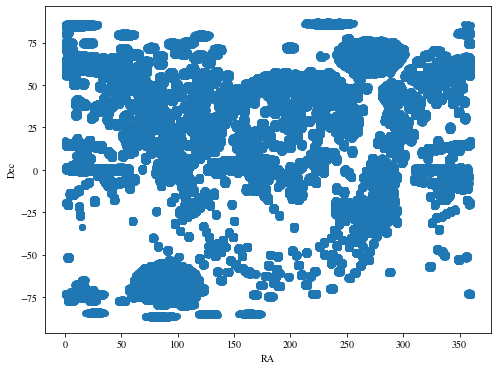

In [29]:
#Plotting RA and Dec

plt.figure(figsize = (8, 6))
plt.scatter(data_snrfilter[0], data_snrfilter[1])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

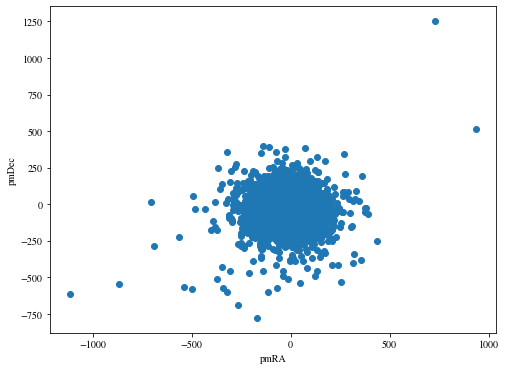

In [30]:
#Proper motions

plt.figure(figsize = (8, 6))
plt.scatter(data_snrfilter[5], data_snrfilter[7])
plt.xlabel('pmRA')
plt.ylabel('pmDec')
plt.show()

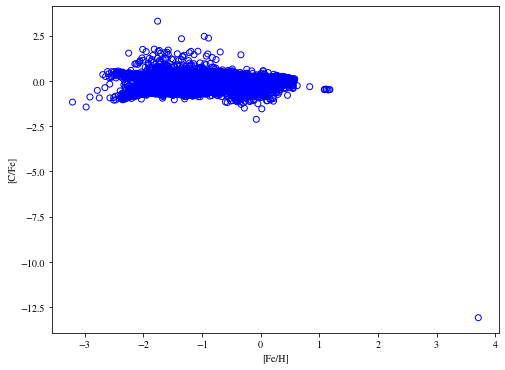

In [33]:
#Looking at chemical abundances

plt.figure(figsize = (8, 6))
plt.scatter(data_snrfilter[20], data_snrfilter[22],facecolors='none', edgecolors='b')
plt.xlabel('[Fe/H]')
plt.ylabel('[C/Fe]')
plt.show()

In [34]:
ra_M3 = 205.548  # [deg]
dec_M3 = 28.3772  # [deg]
dist_M3 = 10180  # [pc]
rt_M3 = 159.0339  # [pc] -- tidal radius @ apogalacticon
rhm_M3 = 6.34  # [pc]
rhm_M3_deg = math.degrees(math.atan(rhm_M3 / dist_M3))  # deg
pmra_M3 = -0.152  # [mas/yr]
pmdec_M3 = -2.670  # [mas/yr]

In [35]:
# Select all the stars within some radius of the cluster:
def in_circle(center_x, center_y, radius, x, y):
    square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
    return square_dist <= (radius) ** 2

ra_filtered = data_snrfilter[0]
dec_filtered = data_snrfilter[1]

# Select stars within 8 * r,hm (useful for large enough sample of probable cluster members):
in_halfmass = in_circle(ra_M3, dec_M3, 8*rhm_M3_deg, ra_filtered, dec_filtered)
indices_control = np.where(in_halfmass==True)

controlgroup = []
for i in data_snrfilter:
    b = np.array(i)[indices_control]
    controlgroup.append(b)

# Example control group parameters: 
ra_control = controlgroup[0]
dec_control = controlgroup[1]

print("There are {} stars in our M3 control group.".format(len(ra_control)))

There are 115 stars in our M3 control group.


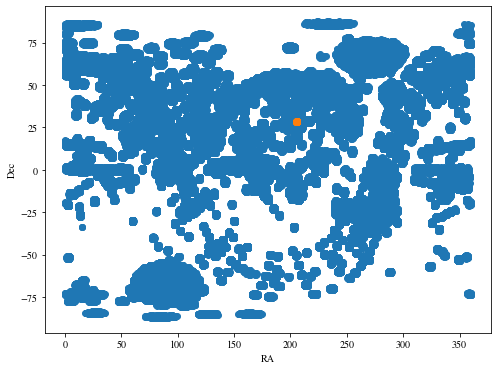

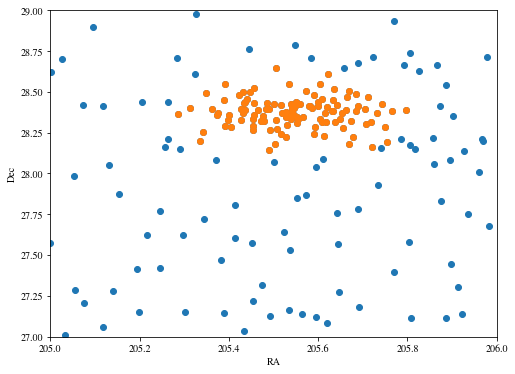

In [36]:
#Plotting RA and Dec with control group

plt.figure(figsize = (8, 6))
plt.scatter(data_snrfilter[0], data_snrfilter[1])
plt.scatter(controlgroup[0], controlgroup[1])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

#same plot, zoomed in

plt.figure(figsize = (8, 6))
plt.scatter(data_snrfilter[0], data_snrfilter[1])
plt.scatter(controlgroup[0], controlgroup[1])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.xlim(205,206)
plt.ylim(27,29)
plt.show()

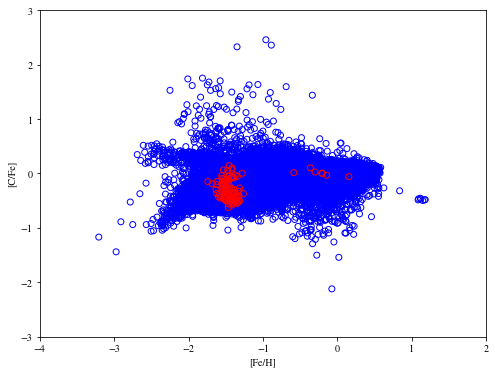

In [39]:
#Looking at chemical abundances, with control group

plt.figure(figsize = (8, 6))
plt.scatter(data_snrfilter[20], data_snrfilter[22],facecolors='none', edgecolors='b')
plt.scatter(controlgroup[20], controlgroup[22],facecolors='none', edgecolors='r')
plt.xlabel('[Fe/H]')
plt.ylabel('[C/Fe]')
plt.xlim(-4,2)
plt.ylim(-3,3)
plt.show()